# Homework 3
###### by Mher Movsisyan
---

### Problem a
Plot the data and describe the main features of the series, i.e., check stationarity: 
visually and using ADF/KPSS tests. (10 points)  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

(df := pd.read_csv("data_hw3.csv"))

,Date,value
0,1995 Q1,370.670
1,1995 Q2,443.880
2,1995 Q3,458.491
3,1995 Q4,462.822
4,1996 Q1,361.281
...,...,...
107,2021 Q4,545.458
108,2022 Q1,528.202
109,2022 Q2,479.048
110,2022 Q3,494.042


<Axes: ylabel='value'>

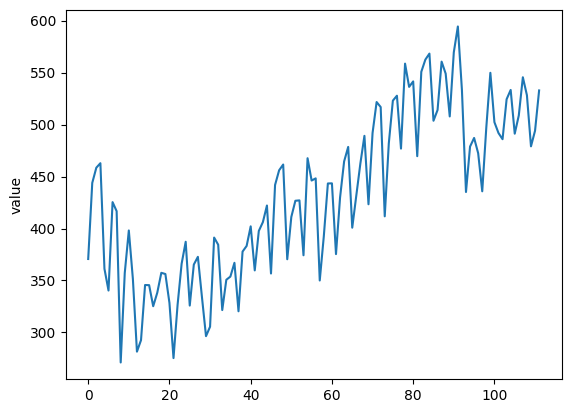

In [3]:
sns.lineplot(data=df, y="value", x=df.index)

In [4]:
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.simplefilter("ignore")

result_adf = adfuller(df.value)
print('ADF Statistic: %f' % result_adf[0])
print('p-value: %f' % result_adf[1])
print('Critical Values:')
for key, value in result_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.125296
p-value: 0.704879
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.582


In [5]:
result_kpss = kpss(df.value)
print('\nKPSS Statistic: %f' % result_kpss[0])
print('p-value: %f' % result_kpss[1])
print('Critical Values:')
for key, value in result_kpss[3].items():
    print('\t%s: %.3f' % (key, value))


KPSS Statistic: 1.643696
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


### Problem b
Choose ratio of Nobs (test)/Nobs (train)<sup>1</sup> and divide series into two parts. Use Exponential 
Smoothing to choose ETS model for the train set, specify seasonalityand trend as none. (10 points)

In [6]:
train_size = int(len(df.value) * 0.8)
train = df.value[:train_size]
test = df.value[train_size:]

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# create an Exponential Smoothing model and fit it to the train set
model = ExponentialSmoothing(train, trend=None, seasonal=None)
model_fit = model.fit()

# print the model summary
print(model_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    value   No. Observations:                   89
Model:             ExponentialSmoothing   SSE                         159782.969
Optimized:                         True   AIC                            670.871
Trend:                             None   BIC                            675.849
Seasonal:                          None   AICC                           671.347
Seasonal Periods:                  None   Date:                 Sun, 16 Apr 2023
Box-Cox:                          False   Time:                         10:15:17
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2754105                alpha                 True
initial_level              405.458

### Problem c
Use Exponential Smoothing to choose a seasonal ETS model for the train set, include seasonality and trend, if needed. Compare AIC, BIC with their counterparts from the model in part b and choose the best one (comment). (10 points)

In [8]:
model_seasonal = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
model_seasonal_fit = model_seasonal.fit()

print(model_seasonal_fit.summary())
print("AIC: {} -> {}".format(model_fit.aic, model_seasonal_fit.aic))
print("BIC: {} -> {}".format(model_fit.bic, model_seasonal_fit.bic))

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    value   No. Observations:                   89
Model:             ExponentialSmoothing   SSE                          91334.362
Optimized:                         True   AIC                            649.094
Trend:                         Additive   BIC                            688.913
Seasonal:                      Additive   AICC                           658.866
Seasonal Periods:                    12   Date:                 Sun, 16 Apr 2023
Box-Cox:                          False   Time:                         10:15:17
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2814607                alpha                 True
smoothing_trend          

### Problem d
Check the residuals of your preferred ETS model (ACF, QQ plot,Ljung-Box test, comment on all results). (10 points)

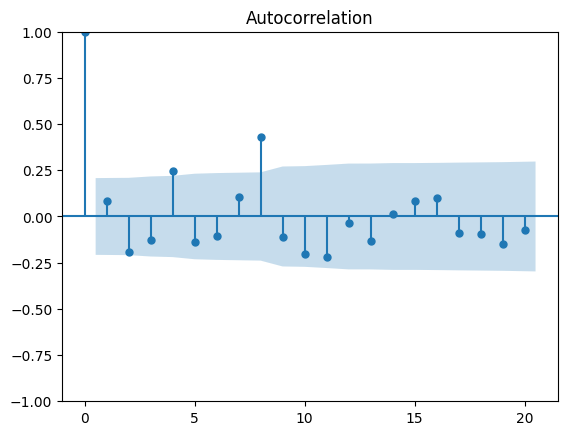

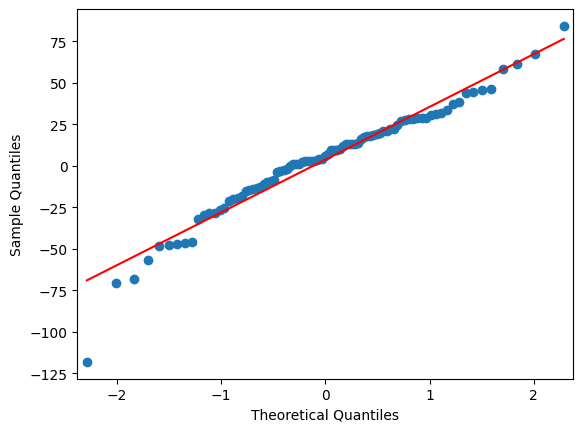

In [9]:
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf

residuals = model_seasonal_fit.resid
plot_acf(residuals, lags=20)
qqplot(residuals, line='s')
plt.show()

### Problem e
Build SARIMA model on train set, include all steps, i.e., ADF test, ACF, PACF, etc. (comment on 
all steps). (20 points)


In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train.diff(), order=(8,1,8), seasonal_order=(0,0,0,12)) # we noticed the 8th lag is significant
model_fit = model.fit()
model_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   89
Model:               SARIMAX(8, 1, 8)   Log Likelihood                -413.491
Date:                Sun, 16 Apr 2023   AIC                            860.982
Time:                        11:14:06   BIC                            903.096
Sample:                             0   HQIC                           877.949
                                 - 89                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3694      0.197     -1.873      0.061      -0.756       0.017
ar.L2         -0.6065      0.207     -2.926      0.003      -1.013      -0.200
ar.L3         -0.3433      0.275     -1.248      0.212      -0.883       0.196
ar.L4         -0.1615      0.257     -0.628      0.530      -0.665       0.342
ar.L5         -0.1932      0.229     -0.843      0.399      -0.642       0.256
ar.L6          0.0299      0.197      0.152      0.880      -0.357       0.416
ar.L7         -0.3183      0.167     -1.911      0.056      -0.645       0.008
ar.L8          0.4369      0.171      2.551      0.011       0.101       0.773
ma.L1         -1.3008     21.208     -0.061      0.951     -42.868      40.267
ma.L2          0.6273     15.278      0.041      0.967     -29.318      30.572
ma.L3         -0.3456     30.248     -0.011      0.991     -59.630      58.939
ma.L4          0.3744     59.821      0.006      0.995    -116.873     117.622
ma.L5         -0.3776     43.613     -0.009      0.993     -85.857      85.101
ma.L6          0.0349      6.585      0.005      0.996     -12.872      12.942
ma.L7          0.8286     38.891      0.021      0.983     -75.397      77.054
ma.L8         -0.8402     25.675     -0.033      0.974     -51.162      49.482
sigma2       466.6101   1.42e+04      0.033      0.974   -2.74e+04    2.83e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 1.81
Prob(Q):                              0.60   Prob(JB):                         0.40
Heteroskedasticity (H):               0.49   Skew:                             0.03
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Problem f
Use auto.arima function and compare with the results which you obtained in point e and 
choose the best SARIMA model (comment).

### Problem g
Forecast for the test set with best SARIMA and best ETS models. Compare forecasting 
performance of two models over the test set. i.e., calculate RMSE (Root Mean Square Error) 
Which model do you prefer (comment)?

In [16]:
from pmdarima.arima import auto_arima

# Perform auto.arima and compare the results
auto_model = auto_arima(train, seasonal=True, m=12, suppress_warnings=True)
print(auto_model.summary())

# Compare the performance of the two models using AIC and BIC
print(f"SARIMA model AIC: {model_fit.aic}")
print(f"auto.arima model AIC: {auto_model.aic()}")

print(f"SARIMA model BIC: {model_fit.bic}")
print(f"auto.arima model BIC: {auto_model.bic()}")

# Compare the performance of the two models using RMSE
sarima_pred = model_fit.predict(start=1, end=len(test), typ='levels')
sarima_rmse = ((test - sarima_pred) ** 2).mean() ** 0.5

auto_arima_pred = auto_model.predict(len(test))
auto_arima_rmse = ((test - auto_arima_pred) ** 2).mean() ** 0.5

print(f"SARIMA model RMSE: {sarima_rmse}")
print(f"auto.arima model RMSE: {auto_arima_rmse}")

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   89
Model:             SARIMAX(4, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -427.157
Date:                            Sun, 16 Apr 2023   AIC                            866.315
Time:                                    11:15:15   BIC                            881.179
Sample:                                         0   HQIC                           872.303
                                             - 89                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5037      0.099     -5.075      0.000      -0.698      -0.309
ar.L2         -0.5181      0.114   

### Problem h

<Axes: ylabel='predicted_mean'>

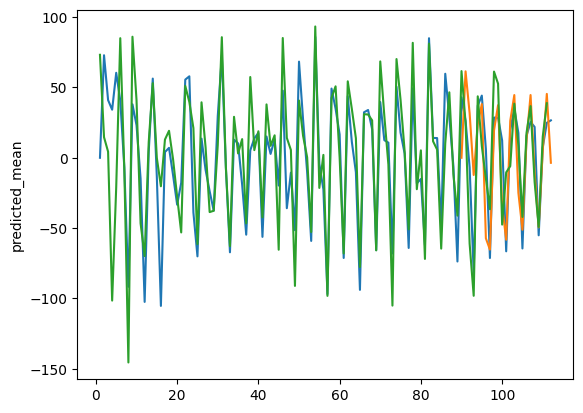

In [17]:
model_test = SARIMAX(test.diff(), order=(8,1,8), seasonal_order=(0, 0, 0,12)) # we noticed the 8th lag is significant
model_fit_test = model_test.fit()

sns.lineplot(model_fit.predict(start=1, end=len(df)))
sns.lineplot(model_fit_test.predict(start=1, end=len(test)))
sns.lineplot(df.value.diff())